# Rainfall Prediction With Machine Learning Models: ***Logistic Regression***, ***Descision Trees*** And ***Simple Vector Machine***

## Introduction:
Rainfall prediction is a challenging and uncertain task with substantial impacts on society. Timely and accurate forecasts can proactively mitigate human and financial losses. This study focuses on leveraging common machine learning techniques to predict whether it will rain tomorrow based on weather data from major cities in Australia. By employing ML algorithms, we aim to enhance accuracy in rainfall prediction, particularly benefiting sectors like agriculture and disaster preparedness. Analyzing meteorological variables such as temperature and humidity, our models uncover patterns for more reliable forecasts. With ML's adaptability to real-time data and capability to handle complex relationships, we anticipate significant improvements over traditional methods, thereby facilitating better decision-making across various industries.

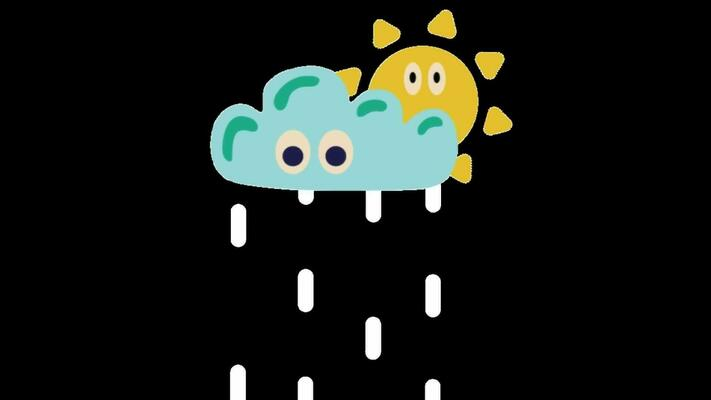

## Importing Datset

In our study, we utilize a dataset sourced from Kaggle, comprising a decade's worth of daily weather observations (2007-2017) from various Australian weather stations. This dataset encompasses 24 features and encompasses 142,193 data entries. To facilitate our analysis, we've uploaded the dataset onto Google Drive for accessibility and further exploration.The original dataset can be found at :

https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/download?datasetVersionNumber=2

the google drive link to download it at :

https://drive.google.com/uc?export=download&id=1t2K281W4paE1gOuFtJUHmbc4iKcWiULb

In [5]:
import requests

# File share link
file_url = "https://drive.google.com/uc?export=download&id=1t2K281W4paE1gOuFtJUHmbc4iKcWiULb"

# Storage path
save_path = "Weather_DataSet.csv"

# Send a GET request to the file URL
response = requests.get(file_url)

# Check if the request was successful 
if response.status_code == 200:
    # Write the content of the response to a file
    with open(save_path, 'wb') as f:
        f.write(response.content)
    print("File downloaded successfully!")
else:
    print("Failed to download the file. Status code:", response.status_code)


File downloaded successfully!


In [7]:
import pandas as pd
df = pd.read_csv('Weather_DataSet.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Data Exploration

Data exploration is essential for understanding dataset characteristics and patterns. It involves summarizing statistics, visualizing data, and identifying missing values and outliers. This process guides feature engineering and modeling decisions, laying the groundwork for effective analysis and interpretation.

We will first check the number of rows and columns. Next, we’ll check the size of the dataset to decide if it needs size compression

In [8]:
df.shape

(145460, 23)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### Visualization of Dataset

Text(0.5, 1.0, 'type of our data ')

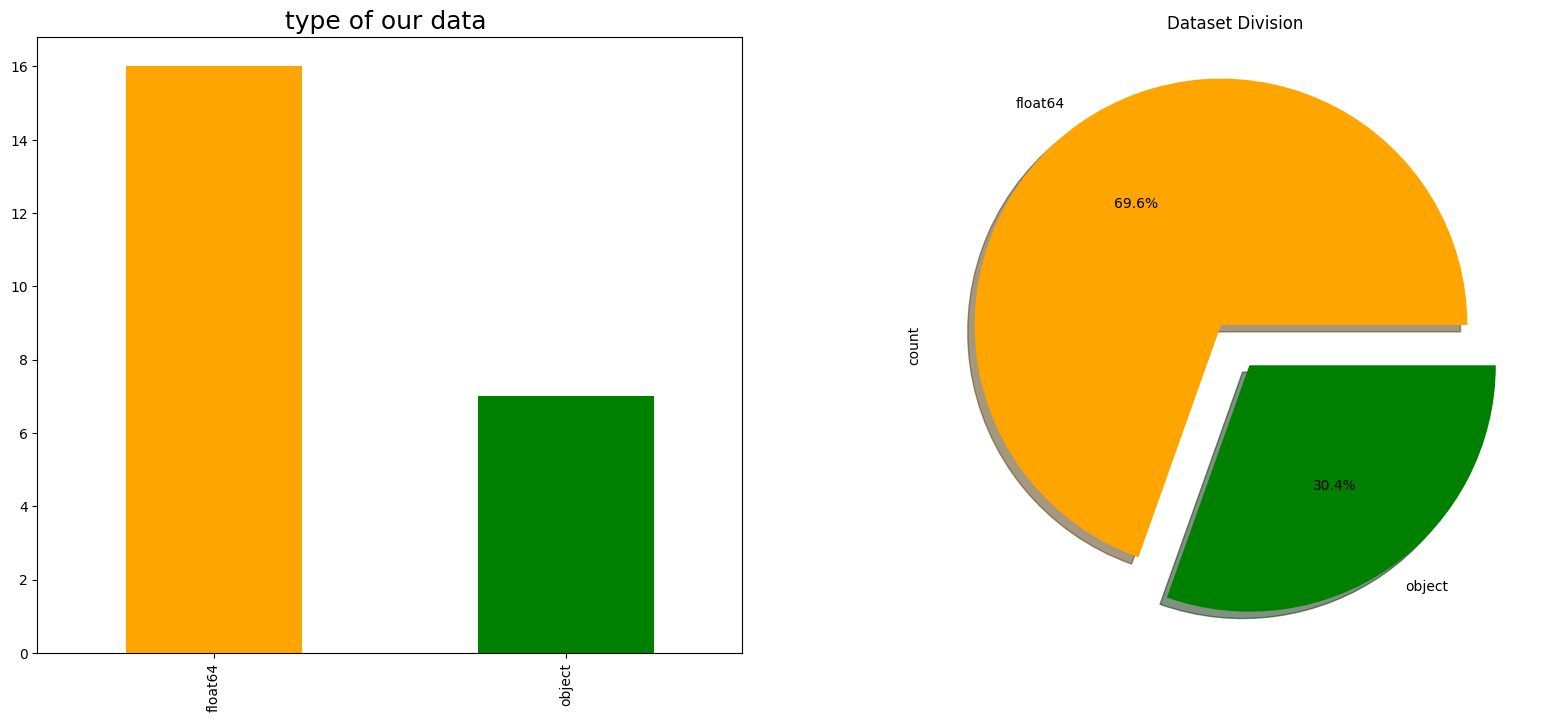

In [10]:
import matplotlib.pyplot as plt

fig, axarr = plt.subplots(1, 2, figsize=(20, 8))

df.dtypes.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,ax=axarr[1],colors= ['orange','green'])
axarr[1].set_title("Dataset Division ", fontsize=18)

df.dtypes.value_counts().plot(kind='bar',ax=axarr[0],color= ['orange','green'])
plt.title('Dataset Division');
axarr[0].set_title("type of our data ", fontsize=18)

### Convertion of ***“RainToday”*** and ***“RainTomorrow”*** which are objects in the form of (Yes / No) to binary (1/0) for our convenience.

In [11]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

### Checking whther Dataset is imbalanced.
If the data set is unbalanced, the majority is either downsampled or the minority is oversampled to balance it.

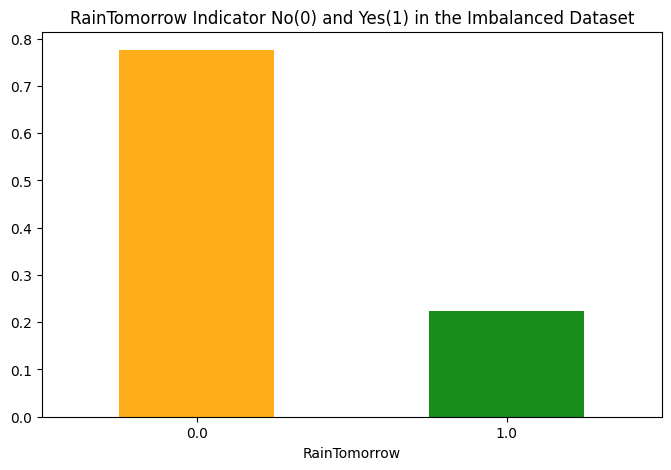

In [12]:
fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['orange','green'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

### Handling Class Imbalance

It is observed that the presence of “0” and “1” is almost in the 78:22 ratio. This indicates class imbalance and so for further use it needs to be handled.To remove the the class imbalance here, the minority needs to be oversampled. Subsampling the majority class wouldn't be beneficial due to the dataset's small size, as it could potentially lead to information loss and bias in the model training process.

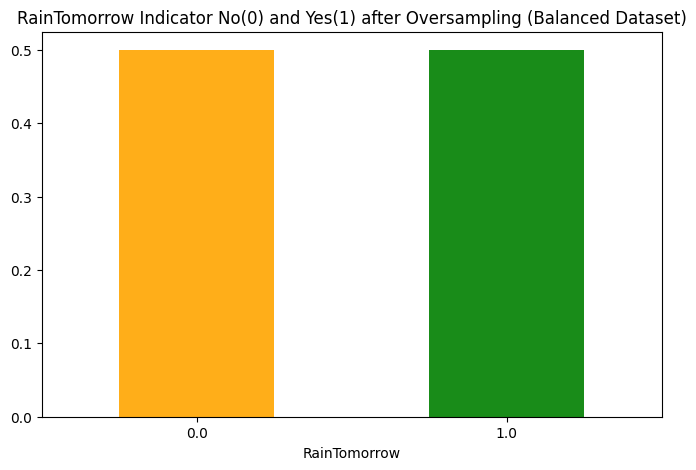

In [13]:
from sklearn.utils import resample

no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

# Plot the distribution after oversampling
fig = plt.figure(figsize=(8, 5))
oversampled['RainTomorrow'].value_counts(normalize=True).plot(kind='bar', color=['orange', 'green'], alpha=0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()


### Checking for missing datas in Dataset

In [14]:
# create a table with data missing
missing_values=df.isnull().sum() # missing values

percent_missing = df.isnull().sum()/df.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing ,
     'data type' : df.dtypes
}
frame=pd.DataFrame(value)
frame


,missing_values,percent_missing %,data type
Date,0,0.000000,object
Location,0,0.000000,object
MinTemp,1485,1.020899,float64
MaxTemp,1261,0.866905,float64
Rainfall,3261,2.241853,float64
Evaporation,62790,43.166506,float64
Sunshine,69835,48.009762,float64
WindGustDir,10326,7.098859,object
WindGustSpeed,10263,7.055548,float64
WindDir9am,10566,7.263853,object


### Visualizing missing datas

<Axes: >

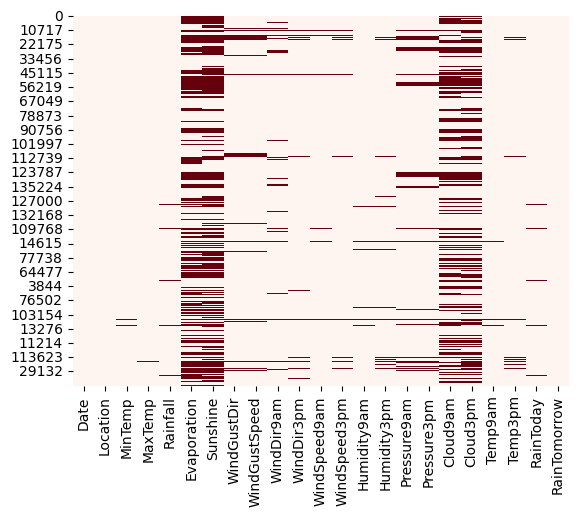

In [15]:
# Missing Data Pattern in Training Data
import seaborn as sns
sns.heatmap(oversampled.isnull(), cbar=False, cmap='Reds')

***“Evaporation”***, ***“Sunshine”***, ***“Cloud9am”***, ***“Cloud3pm”*** are the features with a high missing percentage. So we will check the details of the missing data for these 4 features.

In [16]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
Sunshine,104831,0.475140
Evaporation,95411,0.432444
Cloud3pm,85614,0.388040
Cloud9am,81339,0.368664


It is observed that the 4 features have less than 50% missing data. So instead of rejecting them completely, we’ll consider them in our model with proper imputation.

## Imputation and Transformation
We will impute the categorical columns with mode, and then we will use the label encoder to convert them to numeric numbers. Once all the columns in the full data frame are converted to numeric columns, we will impute the missing values ​​using the Multiple Imputation by Chained Equations (MICE) package.

Then we will detect outliers using the interquartile range and remove them to get the final working dataset. Finally, we will check the correlation between the different variables, and if we find a pair of highly correlated variables, we will discard one while keeping the other.

In [17]:
oversampled.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [18]:
# Impute categorical var with Mode
oversampled['Date'] = oversampled['Date'].fillna(oversampled['Date'].mode()[0])
oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

In [19]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [20]:
import warnings
warnings.filterwarnings("ignore")
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True)
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

In [21]:
# Detecting outliers with IQR
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1535.000000
Location           25.000000
MinTemp             9.300000
MaxTemp            10.200000
Rainfall            2.400000
Evaporation         4.120044
Sunshine            5.979485
WindGustDir         9.000000
WindGustSpeed      19.000000
WindDir9am          8.000000
WindDir3pm          8.000000
WindSpeed9am       13.000000
WindSpeed3pm       11.000000
Humidity9am        26.000000
Humidity3pm        30.000000
Pressure9am         8.800000
Pressure3pm         8.800000
Cloud9am            4.000000
Cloud3pm            3.684676
Temp9am             9.300000
Temp3pm             9.800000
RainToday           1.000000
RainTomorrow        1.000000
dtype: float64


In [22]:
# Removing outliers from the dataset
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(170669, 23)

We observe that the original dataset had the form (87927, 24). After running a code snippet for removing outliers, the dataset now has the form (86065, 24). As a result, the dataset is now free of 1862 outliers. We are now going to check multicollinearity, that is to say if a character is strongly correlated with another.

<Axes: >

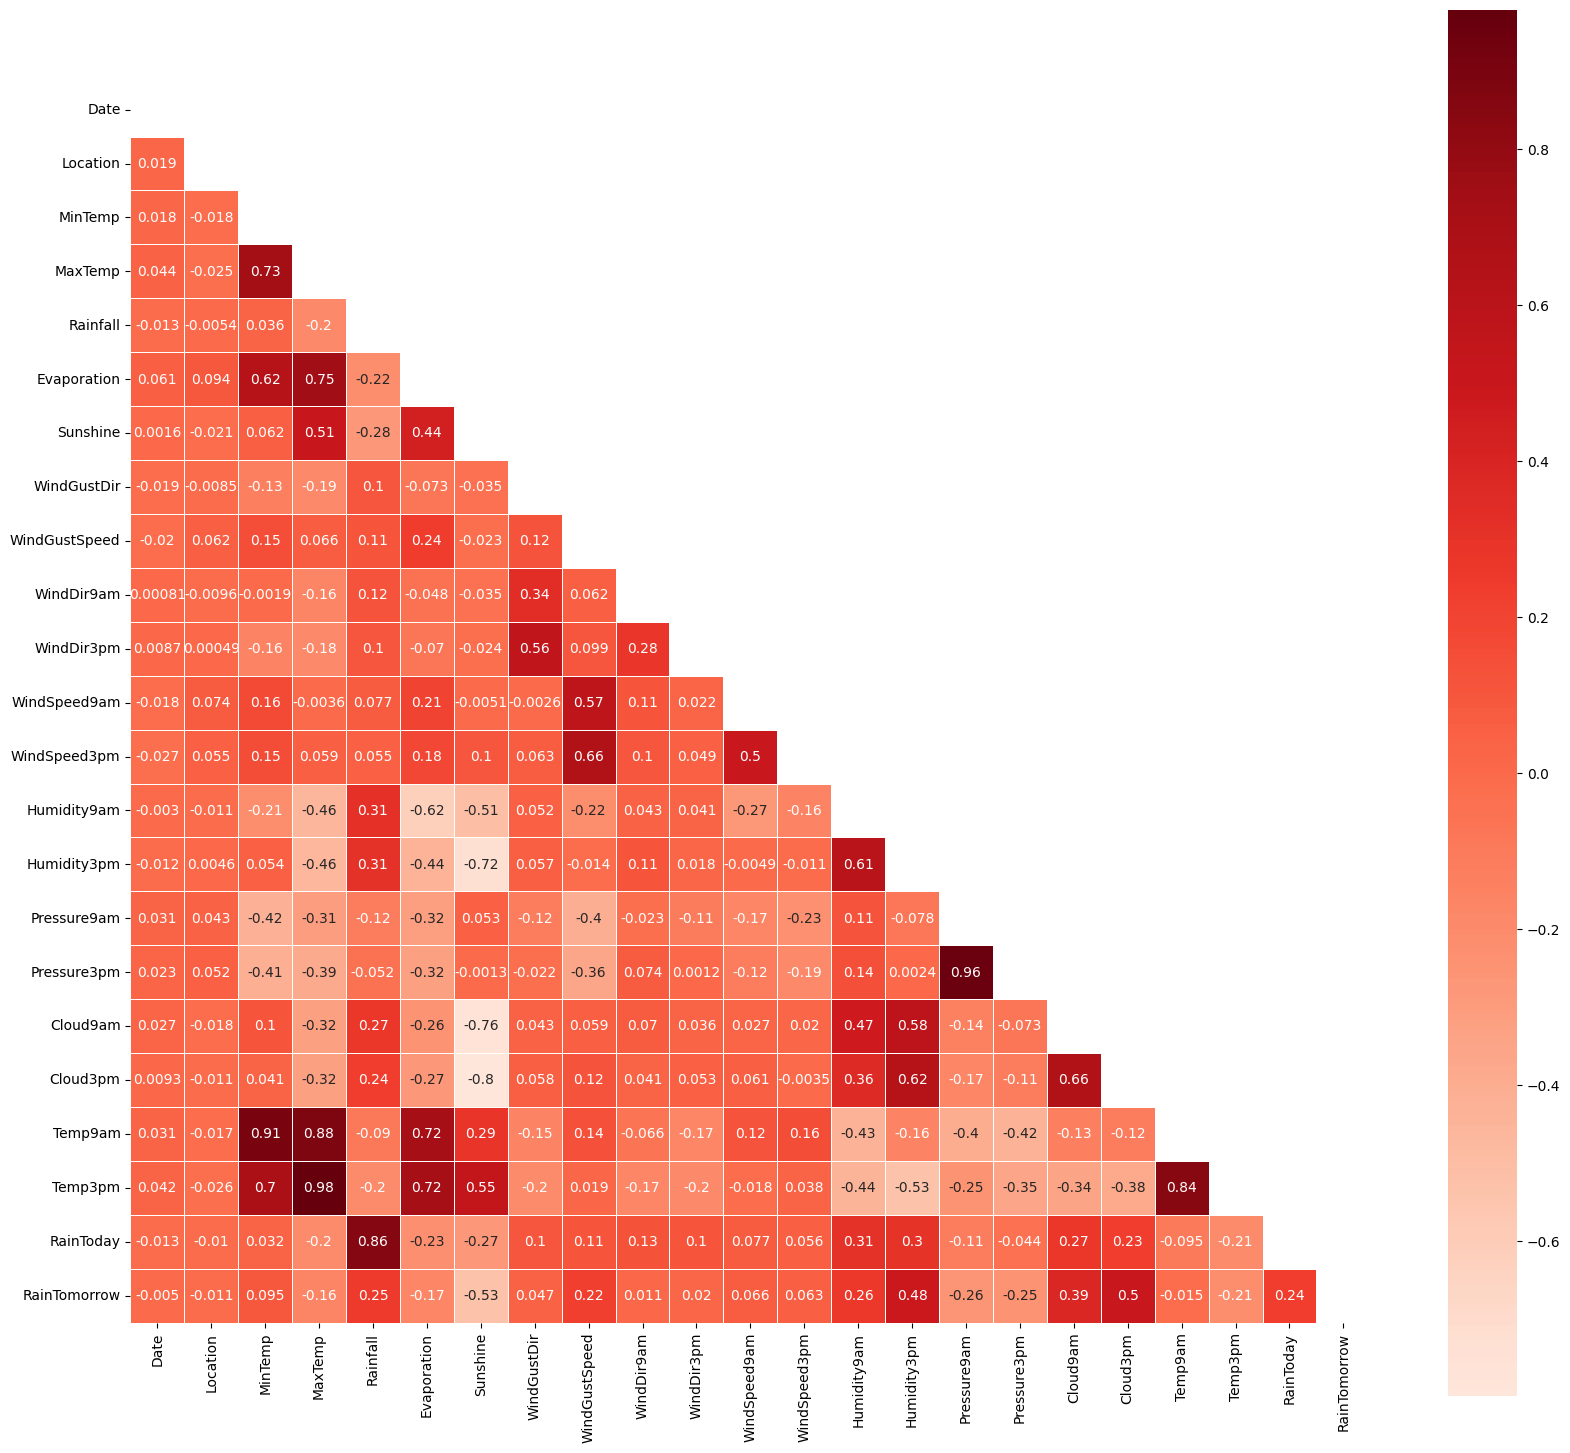

In [23]:
# Correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap='Reds', vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

The following feature pairs have a strong correlation with each other:

     * MaxTemp and MinTemp
    * Pressure9h and pressure3h
    * Temp9am and Temp3pm
    * Evaporation and MaxTemp
    * MaxTemp and Temp3pm But in no case is the correlation value equal to a perfect “1”. We are therefore not removing any functionality

However, we can delve deeper into the pairwise correlation between these highly correlated characteristics by examining the following pair diagram. Each of the paired plots shows very clearly distinct clusters of RainTomorrow’s “yes” and “no” clusters. There is very minimal overlap between them.

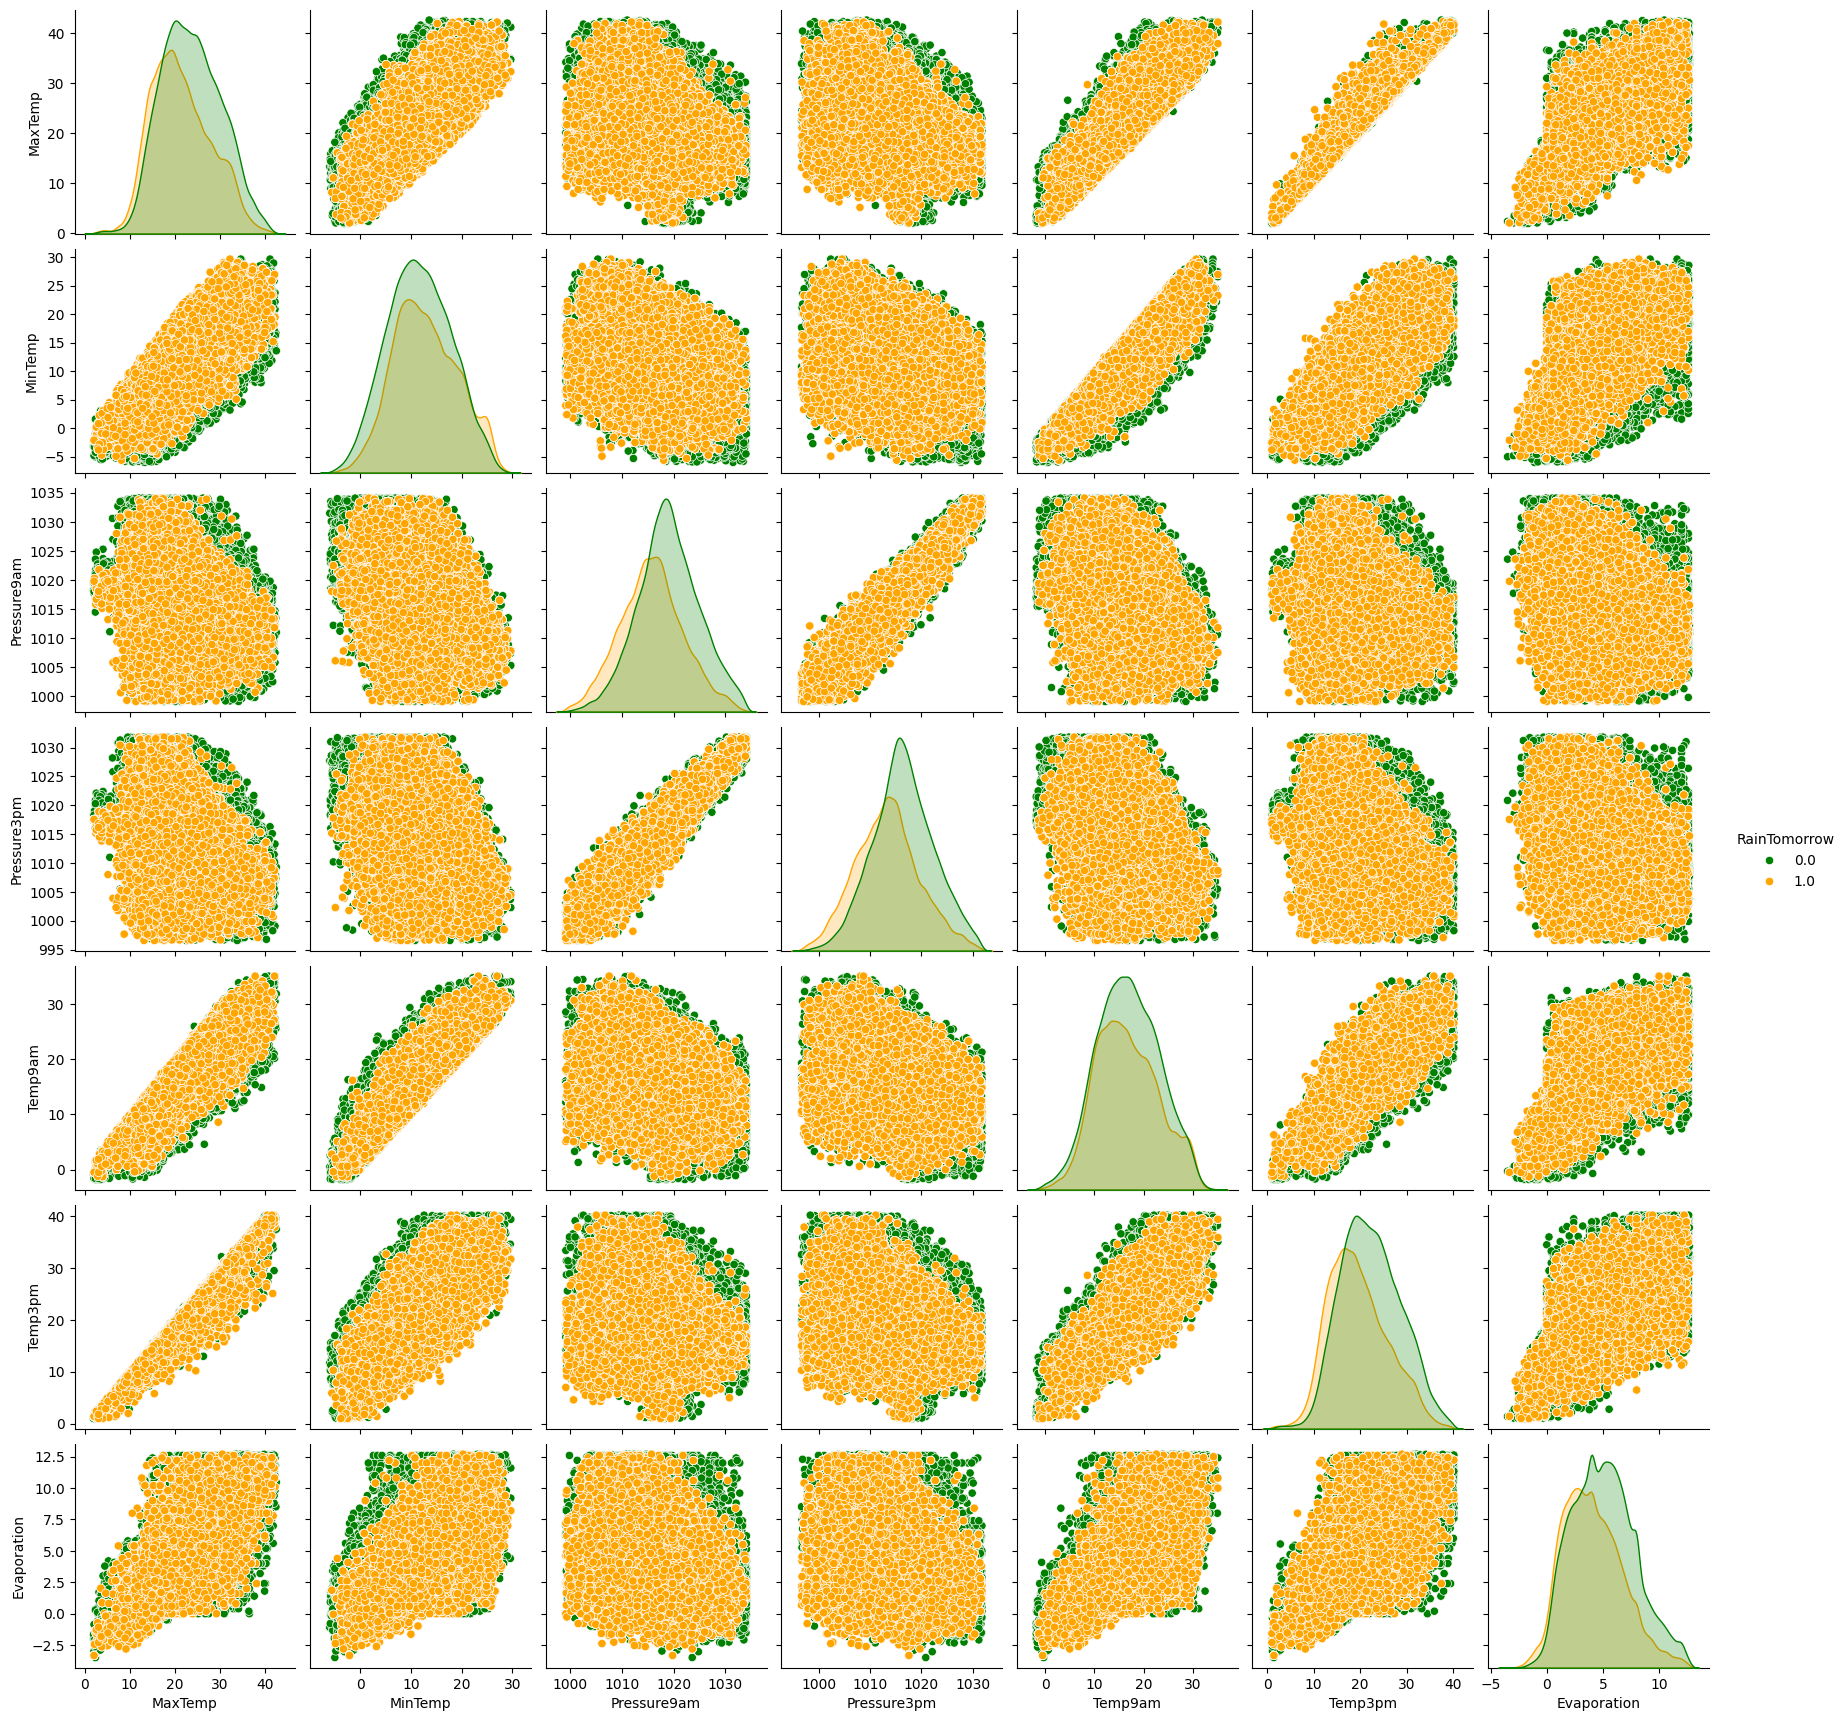

In [24]:

# Define a custom color palette
custom_palette = ["green", "orange"]  # Specify colors as needed

# Use pairplot with the custom color palette
sns.pairplot(data=MiceImputed, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow', palette=custom_palette)


## Feature Selection for Rainfall Prediction
We use both the filter method and the wrapper method (Random Forest) for feature selection to train our rainfall prediction model.

Selecting features by filtering method (chi-square value): before doing this, we must first normalize our data. We use MinMaxScaler instead of StandardScaler in order to avoid negative values.

In [25]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)

In [26]:
# Feature Importance using Filter Method (Chi-Square)
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday'],
      dtype='object')


### Selection of features by wrapping method (random forest):

In [27]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Sunshine', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']
[0.03253427 0.02881107 0.03314079 0.03249158 0.02143225 0.03311921
 0.13843799 0.02077917 0.04263648 0.021398   0.02169729 0.02179529
 0.02339751 0.0344056  0.10634039 0.0483552  0.06129439 0.05797767
 0.13958632 0.03162141 0.03627126 0.01247686]


## Training Rainfall Prediction Model with Different Models
We will divide the dataset into training (75%) and test (25%) sets respectively to train the rainfall prediction model. For best results, we will standardize our X_train and X_test data:

### Logistic Regression Model

Accuracy: 0.7034335266889319
RMSE: 0.5445791708384266
Precision: 0.7020032739583939
Recall: 0.7034335266889319
F1-score: 0.7015358367557786
Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.77      0.74     18993
         1.0       0.68      0.62      0.65     15141

    accuracy                           0.70     34134
   macro avg       0.70      0.69      0.70     34134
weighted avg       0.70      0.70      0.70     34134

Confusion Matrix:
[[14626  4367]
 [ 5756  9385]]
Processing Time: 0.8018579483032227 seconds


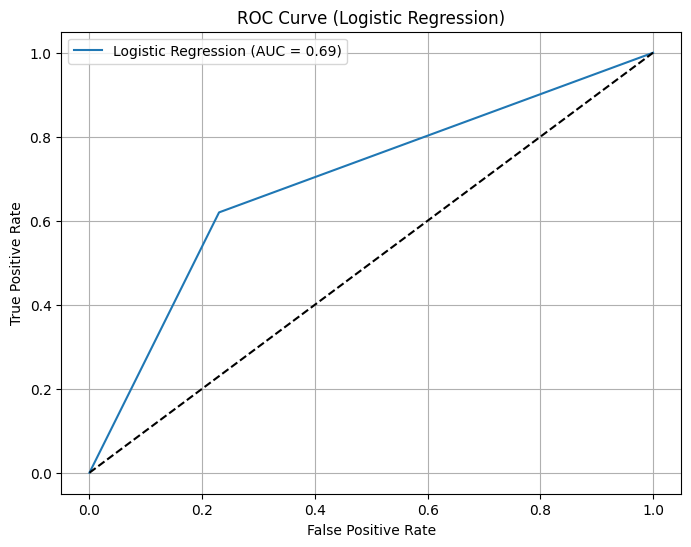

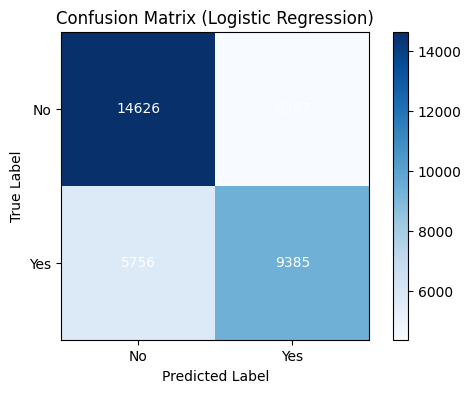

In [28]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score
import time
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming MiceImputed contains your dataset with features and target variable 'RainTomorrow'
# X contains features, y contains target variable
X = MiceImputed[['MaxTemp', 'MinTemp', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation']]
y = MiceImputed['RainTomorrow']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model_lr = LogisticRegression()

# Train the model and record the processing time
start_time = time.time()
model_lr.fit(X_train, y_train)
tt_lr = time.time() - start_time

# Predict on the testing set
y_pred = model_lr.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate precision, recall, and f1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Classification report
classification_rep = classification_report(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy_lr)
print("RMSE:", rmse)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)
print("Processing Time:", tt_lr, "seconds")

# Calculate ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc_score_lr = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score_lr:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression)')
plt.legend()
plt.grid(True)
plt.show()

# Plot confusion matrix
y_pred = model_lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Logistic Regression)')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['No', 'Yes'])
plt.yticks([0, 1], ['No', 'Yes'])
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

## Decsision Tree Model

Accuracy: 0.8974043475713365
RMSE: 0.32030556103299784
Precision: 0.9066816630357885
Recall: 0.8974043475713365
F1-score: 0.897714211181723
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.85      0.90     18993
         1.0       0.83      0.96      0.89     15141

    accuracy                           0.90     34134
   macro avg       0.90      0.90      0.90     34134
weighted avg       0.91      0.90      0.90     34134

Confusion Matrix:
[[16057  2936]
 [  566 14575]]
Processing Time: 0.6935887336730957 seconds


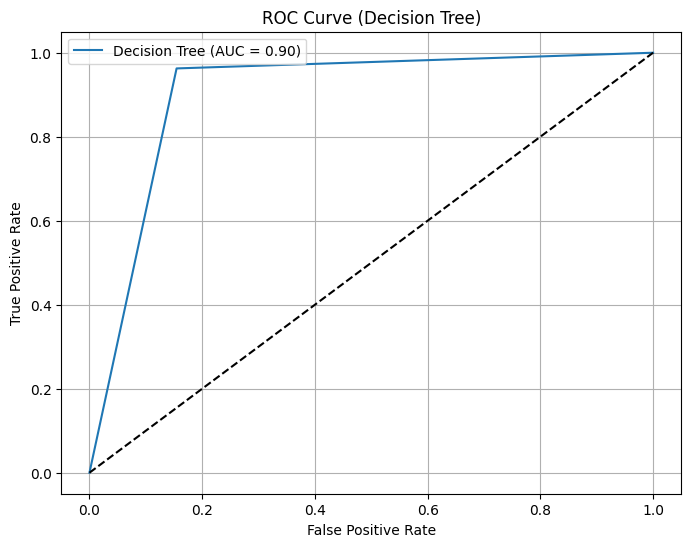

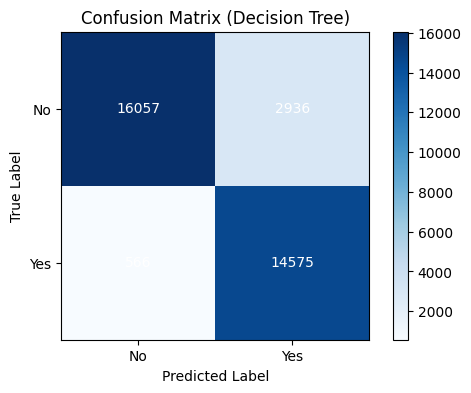

In [29]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error
import time
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming MiceImputed contains your dataset with features and target variable 'RainTomorrow'
# X contains features, y contains target variable
X = MiceImputed[['MaxTemp', 'MinTemp', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation']]
y = MiceImputed['RainTomorrow']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier
model_dt = DecisionTreeClassifier()

# Train the model and record the processing time
start_time = time.time()
model_dt.fit(X_train, y_train)
tt_dt = time.time() - start_time

# Predict on the testing set
y_pred = model_dt.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate precision, recall, and f1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Classification report
classification_rep = classification_report(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy_dt)
print("RMSE:", rmse)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)
print("Processing Time:", tt_dt, "seconds")

# Calculate ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc_score_dt = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {auc_score_dt:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Decision Tree)')
plt.legend()
plt.grid(True)
plt.show()

# Plot confusion matrix
y_pred = model_dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Decision Tree)')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['No', 'Yes'])
plt.yticks([0, 1], ['No', 'Yes'])
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

### Simple Vector Machine Model

Accuracy: 0.699039081267944
RMSE: 0.5485990509762626
Precision: 0.7031159804328548
Recall: 0.699039081267944
F1-score: 0.6899173721092066
Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.84      0.76     18993
         1.0       0.72      0.52      0.61     15141

    accuracy                           0.70     34134
   macro avg       0.71      0.68      0.68     34134
weighted avg       0.70      0.70      0.69     34134

Confusion Matrix:
[[15938  3055]
 [ 7218  7923]]
Processing Time: 743.4653525352478 seconds


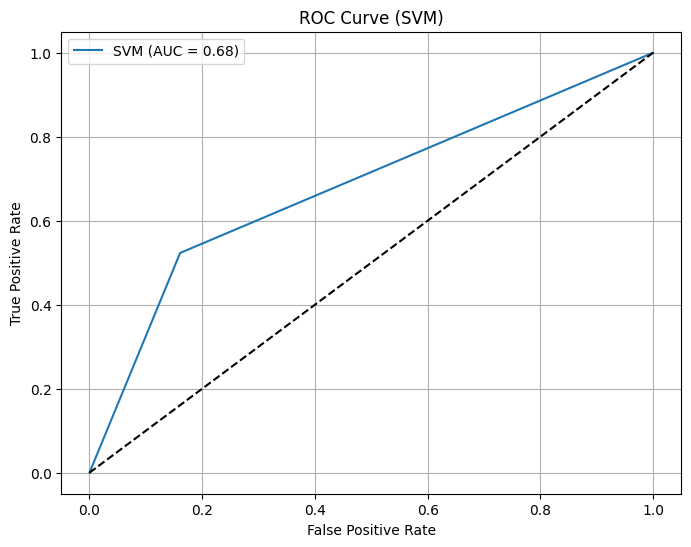

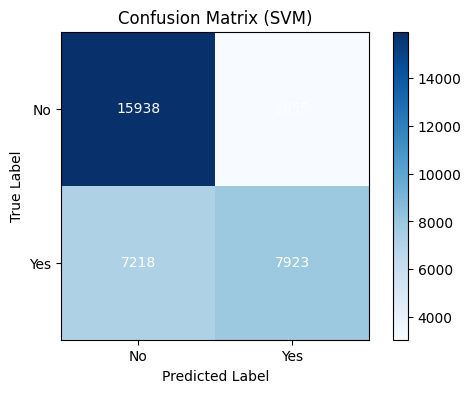

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error
import time
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming MiceImputed contains your dataset with features and target variable 'RainTomorrow'
# X contains features, y contains target variable
X = MiceImputed[['MaxTemp', 'MinTemp', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation']]
y = MiceImputed['RainTomorrow']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
model_svm = SVC()

# Train the model and record the processing time
start_time = time.time()
model_svm.fit(X_train, y_train)
tt_svm = time.time() - start_time

# Predict on the testing set
y_pred = model_svm.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate precision, recall, and f1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Classification report
classification_rep = classification_report(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy_svm)
print("RMSE:", rmse)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)
print("Processing Time:", tt_svm, "seconds")

# Calculate ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc_score_svm = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'SVM (AUC = {auc_score_svm:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SVM)')
plt.legend()
plt.grid(True)
plt.show()

# Plot confusion matrix
y_pred = model_svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix (SVM)')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['No', 'Yes'])
plt.yticks([0, 1], ['No', 'Yes'])
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

## Machine Learning Models Comparison
The best model is selected based on Accuracy, RMSE, Precision, Recall and F1-score.


In [2]:
'''
# Define the evaluation metrics for each model
logistic_regression_metrics = {
    'Accuracy': 0.7041952305619031,
    'RMSE': 0.5438793703001585,
    'Precision': 0.7027794104625148,
    'Recall': 0.7041952305619031,
    'F1-score': 0.7023544042437467
}

decision_tree_metrics = {
    'Accuracy': 0.8959395324310072,
    'RMSE': 0.32258404729464346,
    'Precision': 0.9055586973301574,
    'Recall': 0.8959395324310072,
    'F1-score': 0.8962497625952671
}

svm_metrics = {
    'Accuracy': 0.699039081267944,
    'RMSE': 0.5485990509762626,
    'Precision': 0.7031159804328548,
    'Recall': 0.699039081267944,
    'F1-score': 0.6899173721092066
}

# Calculate the average performance for each model
logistic_regression_avg = sum(logistic_regression_metrics.values()) / len(logistic_regression_metrics)
decision_tree_avg = sum(decision_tree_metrics.values()) / len(decision_tree_metrics)
svm_avg = sum(svm_metrics.values()) / len(svm_metrics)

# Print the average performance for each model
print("Average Performance:")
print("Logistic Regression:", logistic_regression_avg)
print("Decision Tree:", decision_tree_avg)
print("SVM:", svm_avg)

# Determine the best model
best_model = min([(logistic_regression_avg, 'Logistic Regression'), (decision_tree_avg, 'Decision Tree'), (svm_avg, 'SVM')])
print("\nBest Model:", best_model[1])
'''




# Define the evaluation metrics for each model
logistic_regression_metrics = {
    'Accuracy': 0.7041952305619031,
    'RMSE': 0.5438793703001585,
    'Precision': 0.7027794104625148,
    'Recall': 0.7041952305619031,
    'F1-score': 0.7023544042437467
}

decision_tree_metrics = {
    'Accuracy': 0.8959395324310072,
    'RMSE': 0.32258404729464346,
    'Precision': 0.9055586973301574,
    'Recall': 0.8959395324310072,
    'F1-score': 0.8962497625952671
}

svm_metrics = {
    'Accuracy': 0.699039081267944,
    'RMSE': 0.5485990509762626,
    'Precision': 0.7031159804328548,
    'Recall': 0.699039081267944,
    'F1-score': 0.6899173721092066
}

# Calculate the average performance for each model
logistic_regression_avg = sum(logistic_regression_metrics.values()) / len(logistic_regression_metrics)
decision_tree_avg = sum(decision_tree_metrics.values()) / len(decision_tree_metrics)
svm_avg = sum(svm_metrics.values()) / len(svm_metrics)

# Print the average performance for each model
print("Average Performance:")
print("Logistic Regression:", logistic_regression_avg)
print("Decision Tree:", decision_tree_avg)
print("SVM:", svm_avg)

# Determine the best model
best_model = min([(logistic_regression_avg, 'Logistic Regression'), (decision_tree_avg, 'Decision Tree'), (svm_avg, 'SVM')])

# Display the best model
print("\nBest Model:", best_model[1], "(Average Performance:", best_model[0], ")")


Average Performance:
Logistic Regression: 0.6714807292260453
Decision Tree: 0.7832543144164165
SVM: 0.6679421132108423

Best Model: SVM (Average Performance: 0.6679421132108423 )


## Exporting the Best Model: ***SVM***
We use pickle to export the chosen model for futute use

In [33]:
import pickle
with open('Rainfall_Prediction_Using_SVM', 'wb') as file:
    pickle.dump(model_svm, file)